In [116]:
import pandas as pd

In [117]:
focus = pd.read_csv("focused_movie_titles.csv")
wiki = pd.read_csv("data_imdb_wiki_clusters.csv")

In [118]:
focus.head()

titleId  ordering                   title region language        types  \
0  tt0000001         6              Carmencita     US       \N           \N   
1  tt0000002         7  The Clown and His Dogs     US       \N           \N   
2  tt0000003         7            Poor Pierrot     GB       \N  imdbDisplay   
3  tt0000005        11  The Blacksmith's Forge     GB       \N           \N   
4  tt0000005         1     Blacksmithing Scene     US       \N  alternative   

                   attributes isOriginalTitle  
0                          \N               0  
1       literal English title               0  
2                          \N               0  
3  informal alternative title               0  
4                          \N               0

In [119]:
wiki.head()

Unnamed: 0  file_name  cluster
0           0  tt0013340        3
1           1  tt0015712        4
2           2  tt0003747        4
3           3  tt0002806        3
4           4  tt0007105        4

In [120]:
wiki.columns = ['Unnamed: 0','titleId','cluster']
wiki.head()

Unnamed: 0    titleId  cluster
0           0  tt0013340        3
1           1  tt0015712        4
2           2  tt0003747        4
3           3  tt0002806        3
4           4  tt0007105        4

In [121]:
wiki = wiki.drop(columns = ['Unnamed: 0'])
wiki.head()

titleId  cluster
0  tt0013340        3
1  tt0015712        4
2  tt0003747        4
3  tt0002806        3
4  tt0007105        4

In [122]:
fin = pd.merge(focus,  
                      wiki[['titleId','cluster']],  
                      on ='titleId',  
                      how ='inner')

In [123]:
fin

titleId  ordering                    title region language  \
0      tt0000001         6               Carmencita     US       \N   
1      tt0000002         7   The Clown and His Dogs     US       \N   
2      tt0000003         7             Poor Pierrot     GB       \N   
3      tt0000005        11   The Blacksmith's Forge     GB       \N   
4      tt0000005         1      Blacksmithing Scene     US       \N   
...          ...       ...                      ...    ...      ...   
18070  tt0017001         3  The Isle of Retribution     US       \N   
18071  tt0017002         3          It Must Be Love     US       \N   
18072  tt0017003         1            It's the Gate     US       \N   
18073  tt0017003         3           It's the Cat's     US       \N   
18074  tt0017003         4            It's the Cats     US       \N   

             types                  attributes isOriginalTitle  cluster  
0               \N                          \N               0        0  
1               \N       literal English title               0        0  
2      imdbDisplay                          \N               0        0  
3               \N  informal alternative title               0        3  
4      alternative                          \N               0        3  
...            ...                         ...             ...      ...  
18070           \N                          \N               0        2  
18071           \N                          \N               0        2  
18072           \N                review title               0        4  
18073           \N               reissue title               0        4  
18074           \N                          \N               0        4  

[18075 rows x 9 columns]

In [124]:
fin.cluster.unique()

array([0, 3, 4, 2, 1, 5], dtype=int64)

In [125]:
fin.sort_values(by=['cluster'])

titleId  ordering                    title region language  \
0      tt0000001         6               Carmencita     US       \N   
7382   tt0007202         4      Poor Little Peppina     US       \N   
7381   tt0007202         3           Little Peppina     US       \N   
7377   tt0007199         1  Polly Put the Kettle On     US       \N   
7376   tt0007197         1   Police Dog on the Wire     US       \N   
...          ...       ...                      ...    ...      ...   
2558   tt0002851         1             Freak Coward     US       \N   
2559   tt0002851         2    Fatty Joins the Force     US       \N   
6184   tt0006115         7       A Submarine Pirate     US       \N   
10499  tt0010030         1         Crack Your Heels     US       \N   
3714   tt0003947         1             Fatty's Gift     US       \N   

             types attributes isOriginalTitle  cluster  
0               \N         \N               0        0  
7382            \N         \N               0        0  
7381   alternative         \N               0        0  
7377            \N         \N               0        0  
7376            \N         \N               0        0  
...            ...        ...             ...      ...  
2558       working         \N               0        5  
2559            \N         \N               0        5  
6184            \N         \N               0        5  
10499           \N         \N               0        5  
3714            \N         \N               0        5  

[18075 rows x 9 columns]

In [126]:
fin[fin.titleId == 'tt0005750']

titleId  ordering                title region language types  \
5783  tt0005750         2  The Miracle of Love     US       \N    \N   
5784  tt0005750         3  The Miracle of Life     US       \N    \N   

        attributes isOriginalTitle  cluster  
5783  review title               0        0  
5784            \N               0        0

In [127]:
fin1 = fin.drop_duplicates(subset = 'titleId')
fin1

titleId  ordering                    title region language  \
0      tt0000001         6               Carmencita     US       \N   
1      tt0000002         7   The Clown and His Dogs     US       \N   
2      tt0000003         7             Poor Pierrot     GB       \N   
3      tt0000005        11   The Blacksmith's Forge     GB       \N   
9      tt0000006         3        Chinese Opium Den     US       \N   
...          ...       ...                      ...    ...      ...   
18068  tt0016999         1                    Irene     US       \N   
18069  tt0017000         1           The Iron Rider     US       \N   
18070  tt0017001         3  The Isle of Retribution     US       \N   
18071  tt0017002         3          It Must Be Love     US       \N   
18072  tt0017003         1            It's the Gate     US       \N   

             types                  attributes isOriginalTitle  cluster  
0               \N                          \N               0        0  
1               \N       literal English title               0        0  
2      imdbDisplay                          \N               0        0  
3               \N  informal alternative title               0        3  
9               \N                          \N               0        4  
...            ...                         ...             ...      ...  
18068           \N                          \N               0        4  
18069           \N                          \N               0        4  
18070           \N                          \N               0        2  
18071           \N                          \N               0        2  
18072           \N                review title               0        4  

[14307 rows x 9 columns]

In [128]:
ratings = pd.read_csv(r"data_imdb_title.ratings.tsv",sep="\t")

In [129]:
ratings.columns = ['titleId','averageRating','numVotes']
ratings

titleId  averageRating  numVotes
0        tt0000001            5.6      1647
1        tt0000002            6.1       198
2        tt0000003            6.5      1350
3        tt0000004            6.2       120
4        tt0000005            6.2      2137
...            ...            ...       ...
1077499  tt9916580            7.2         5
1077500  tt9916690            6.6         5
1077501  tt9916720            5.9        61
1077502  tt9916766            6.9        14
1077503  tt9916778            7.3        24

[1077504 rows x 3 columns]

In [130]:
fin2 = pd.merge(fin1,  
                      ratings,  
                      on ='titleId',  
                      how ='left')
fin2

titleId  ordering                    title region language  \
0      tt0000001         6               Carmencita     US       \N   
1      tt0000002         7   The Clown and His Dogs     US       \N   
2      tt0000003         7             Poor Pierrot     GB       \N   
3      tt0000005        11   The Blacksmith's Forge     GB       \N   
4      tt0000006         3        Chinese Opium Den     US       \N   
...          ...       ...                      ...    ...      ...   
14302  tt0016999         1                    Irene     US       \N   
14303  tt0017000         1           The Iron Rider     US       \N   
14304  tt0017001         3  The Isle of Retribution     US       \N   
14305  tt0017002         3          It Must Be Love     US       \N   
14306  tt0017003         1            It's the Gate     US       \N   

             types                  attributes isOriginalTitle  cluster  \
0               \N                          \N               0        0   
1               \N       literal English title               0        0   
2      imdbDisplay                          \N               0        0   
3               \N  informal alternative title               0        3   
4               \N                          \N               0        4   
...            ...                         ...             ...      ...   
14302           \N                          \N               0        4   
14303           \N                          \N               0        4   
14304           \N                          \N               0        2   
14305           \N                          \N               0        2   
14306           \N                review title               0        4   

       averageRating  numVotes  
0                5.6    1647.0  
1                6.1     198.0  
2                6.5    1350.0  
3                6.2    2137.0  
4                5.3     115.0  
...              ...       ...  
14302            7.1      62.0  
14303            6.4      11.0  
14304            1.7      11.0  
14305            NaN       NaN  
14306            6.4      24.0  

[14307 rows x 11 columns]

In [131]:
fin2.averageRating.describe()


count    4109.000000
mean        5.875785
std         1.091454
min         1.000000
25%         5.200000
50%         6.000000
75%         6.600000
max         9.700000
Name: averageRating, dtype: float64

In [132]:
fin2.numVotes.describe()

count      4109.000000
mean        373.444634
std        3216.374872
min           5.000000
25%          10.000000
50%          20.000000
75%          92.000000
max      109805.000000
Name: numVotes, dtype: float64

In [133]:
fin2.averageRating[fin2.averageRating.isna()] = 5.821766

C:\Users\venka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [134]:
fin2.numVotes[fin2.numVotes.isna()] = 373

C:\Users\venka\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
fin2

titleId  ordering                    title region language  \
0      tt0000001         6               Carmencita     US       \N   
1      tt0000002         7   The Clown and His Dogs     US       \N   
2      tt0000003         7             Poor Pierrot     GB       \N   
3      tt0000005        11   The Blacksmith's Forge     GB       \N   
4      tt0000006         3        Chinese Opium Den     US       \N   
...          ...       ...                      ...    ...      ...   
14302  tt0016999         1                    Irene     US       \N   
14303  tt0017000         1           The Iron Rider     US       \N   
14304  tt0017001         3  The Isle of Retribution     US       \N   
14305  tt0017002         3          It Must Be Love     US       \N   
14306  tt0017003         1            It's the Gate     US       \N   

             types                  attributes isOriginalTitle  cluster  \
0               \N                          \N               0        0   
1               \N       literal English title               0        0   
2      imdbDisplay                          \N               0        0   
3               \N  informal alternative title               0        3   
4               \N                          \N               0        4   
...            ...                         ...             ...      ...   
14302           \N                          \N               0        4   
14303           \N                          \N               0        4   
14304           \N                          \N               0        2   
14305           \N                          \N               0        2   
14306           \N                review title               0        4   

       averageRating  numVotes  
0           5.600000    1647.0  
1           6.100000     198.0  
2           6.500000    1350.0  
3           6.200000    2137.0  
4           5.300000     115.0  
...              ...       ...  
14302       7.100000      62.0  
14303       6.400000      11.0  
14304       1.700000      11.0  
14305       5.821766     373.0  
14306       6.400000      24.0  

[14307 rows x 11 columns]

In [136]:
titlebasics = pd.read_csv(r"data_imdb_title.basics.tsv",sep="\t")
#titleprinciples = pandas.read_csv("C:\Users\venka\Downloads\data_imdb_title.principals.tsv",sep="\t")
titlebasics

C:\Users\venka\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


tconst  titleType               primaryTitle  \
0        tt0000001      short                 Carmencita   
1        tt0000002      short     Le clown et ses chiens   
2        tt0000003      short             Pauvre Pierrot   
3        tt0000004      short                Un bon bock   
4        tt0000005      short           Blacksmith Scene   
...            ...        ...                        ...   
7206385  tt9916848  tvEpisode              Episode #3.17   
7206386  tt9916850  tvEpisode              Episode #3.19   
7206387  tt9916852  tvEpisode              Episode #3.20   
7206388  tt9916856      short                   The Wind   
7206389  tt9916880  tvEpisode  Horrid Henry Knows It All   

                     originalTitle  isAdult startYear endYear runtimeMinutes  \
0                       Carmencita        0      1894      \N              1   
1           Le clown et ses chiens        0      1892      \N              5   
2                   Pauvre Pierrot        0      1892      \N              4   
3                      Un bon bock        0      1892      \N             12   
4                 Blacksmith Scene        0      1893      \N              1   
...                            ...      ...       ...     ...            ...   
7206385              Episode #3.17        0      2010      \N             \N   
7206386              Episode #3.19        0      2010      \N             \N   
7206387              Episode #3.20        0      2010      \N             \N   
7206388                   The Wind        0      2015      \N             27   
7206389  Horrid Henry Knows It All        0      2014      \N             10   

                           genres  
0               Documentary,Short  
1                 Animation,Short  
2        Animation,Comedy,Romance  
3                 Animation,Short  
4                    Comedy,Short  
...                           ...  
7206385       Action,Drama,Family  
7206386       Action,Drama,Family  
7206387       Action,Drama,Family  
7206388                     Short  
7206389   Animation,Comedy,Family  

[7206390 rows x 9 columns]

In [137]:
titlebasics.endYear.value_counts()

\N      7140570
2017       4688
2018       4256
2019       3804
2016       3584
         ...   
2025          1
1935          1
2026          1
2027          1
1924          1
Name: endYear, Length: 95, dtype: int64

In [138]:
fin2.attributes.value_counts()

\N                                                                13815
reissue title                                                        97
review title                                                         97
alternative spelling                                                 50
new title                                                            35
literal English title                                                33
series title                                                         25
informal literal English title                                       22
copyright title                                                      20
original script title                                                15
informal English title                                               12
complete title                                                       12
pre-release title                                                    10
subtitle                                                        

In [139]:
fin2.types.value_counts()

\N             12628
imdbDisplay      874
working          490
alternative      282
tv                17
dvd               13
video              3
Name: types, dtype: int64

In [140]:
fin2.ordering.value_counts()

1     9310
2     2002
3     1428
4      617
5      300
6      178
7       91
10      62
11      58
12      48
8       40
9       34
13      33
15      26
14      21
16      14
19      10
17       9
18       8
20       3
25       3
22       3
23       3
28       2
21       2
29       1
24       1
Name: ordering, dtype: int64

In [141]:
fin2.language.value_counts()

\N    14254
en       31
fr       21
es        1
Name: language, dtype: int64

In [142]:
fin2.head()

titleId  ordering                   title region language        types  \
0  tt0000001         6              Carmencita     US       \N           \N   
1  tt0000002         7  The Clown and His Dogs     US       \N           \N   
2  tt0000003         7            Poor Pierrot     GB       \N  imdbDisplay   
3  tt0000005        11  The Blacksmith's Forge     GB       \N           \N   
4  tt0000006         3       Chinese Opium Den     US       \N           \N   

                   attributes isOriginalTitle  cluster  averageRating  \
0                          \N               0        0            5.6   
1       literal English title               0        0            6.1   
2                          \N               0        0            6.5   
3  informal alternative title               0        3            6.2   
4                          \N               0        4            5.3   

   numVotes  
0    1647.0  
1     198.0  
2    1350.0  
3    2137.0  
4     115.0

In [143]:
final = fin2[['titleId','cluster','averageRating','numVotes','title']]
final

titleId  cluster  averageRating  numVotes                    title
0      tt0000001        0       5.600000    1647.0               Carmencita
1      tt0000002        0       6.100000     198.0   The Clown and His Dogs
2      tt0000003        0       6.500000    1350.0             Poor Pierrot
3      tt0000005        3       6.200000    2137.0   The Blacksmith's Forge
4      tt0000006        4       5.300000     115.0        Chinese Opium Den
...          ...      ...            ...       ...                      ...
14302  tt0016999        4       7.100000      62.0                    Irene
14303  tt0017000        4       6.400000      11.0           The Iron Rider
14304  tt0017001        2       1.700000      11.0  The Isle of Retribution
14305  tt0017002        2       5.821766     373.0          It Must Be Love
14306  tt0017003        4       6.400000      24.0            It's the Gate

[14307 rows x 5 columns]

In [144]:
final[final.titleId=='tt0000001']

titleId  cluster  averageRating  numVotes       title
0  tt0000001        0            5.6    1647.0  Carmencita

In [145]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14307 entries, 0 to 14306
Data columns (total 5 columns):
titleId          14307 non-null object
cluster          14307 non-null int64
averageRating    14307 non-null float64
numVotes         14307 non-null float64
title            14307 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 670.6+ KB


In [146]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(final)


OneHotEncoder(handle_unknown='ignore')

In [147]:
onefin = enc.transform(final)


In [148]:
onefin

<14307x28561 sparse matrix of type '<class 'numpy.float64'>'
	with 71535 stored elements in Compressed Sparse Row format>

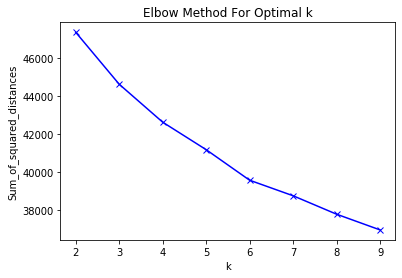

In [149]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10,random_state=32)
    km = km.fit(onefin)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [150]:
true_k = 7
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10,random_state=32)
model.fit(onefin)
labels=model.labels_
labels

array([2, 2, 2, ..., 4, 1, 5])

In [151]:
newfin = enc.inverse_transform(onefin)
newfin

array([['tt0000001', 0, 5.6, 1647.0, 'Carmencita'],
       ['tt0000002', 0, 6.1, 198.0, 'The Clown and His Dogs'],
       ['tt0000003', 0, 6.5, 1350.0, 'Poor Pierrot'],
       ...,
       ['tt0017001', 2, 1.7, 11.0, 'The Isle of Retribution'],
       ['tt0017002', 2, 5.821766, 373.0, 'It Must Be Love'],
       ['tt0017003', 4, 6.4, 24.0, "It's the Gate"]], dtype=object)

In [152]:
newfin = pd.DataFrame(newfin,columns = ['titleId','cluster','averageRating','numVotes','title'])
newfin['mastercluster'] = labels
newfin

titleId cluster averageRating numVotes                    title  \
0      tt0000001       0           5.6     1647               Carmencita   
1      tt0000002       0           6.1      198   The Clown and His Dogs   
2      tt0000003       0           6.5     1350             Poor Pierrot   
3      tt0000005       3           6.2     2137   The Blacksmith's Forge   
4      tt0000006       4           5.3      115        Chinese Opium Den   
...          ...     ...           ...      ...                      ...   
14302  tt0016999       4           7.1       62                    Irene   
14303  tt0017000       4           6.4       11           The Iron Rider   
14304  tt0017001       2           1.7       11  The Isle of Retribution   
14305  tt0017002       2       5.82177      373          It Must Be Love   
14306  tt0017003       4           6.4       24            It's the Gate   

       mastercluster  
0                  2  
1                  2  
2                  2  
3                  6  
4                  5  
...              ...  
14302              5  
14303              5  
14304              4  
14305              1  
14306              5  

[14307 rows x 6 columns]

In [153]:
newfin.cluster.value_counts()

0    4062
4    3764
3    3743
2    2525
5     184
1      29
Name: cluster, dtype: int64

In [154]:
newfin.mastercluster.value_counts()

2    4062
0    2882
3    2624
1    1839
6    1119
5    1010
4     771
Name: mastercluster, dtype: int64

In [155]:
newfin[newfin.cluster == 5]

titleId cluster averageRating numVotes                    title  \
567    tt0000939       5           5.7       10       The Little Teacher   
2172   tt0002839       5       5.82177      373        The Fatal Taxicab   
2184   tt0002851       5           5.3      310             Freak Coward   
2185   tt0002852       5       5.82177      373        A Jealous Husband   
2186   tt0002853       5           4.1       26          Fatty's Day Off   
...          ...     ...           ...      ...                      ...   
9847   tt0011665       5       5.82177      373       The Scrap of Paper   
12914  tt0015342       5           5.8       74             Smile Please   
12941  tt0015376       5           6.7       12        Stupid, But Brave   
13309  tt0015809       5           4.2        9        The Fighting Dude   
13427  tt0015953       5           5.8      273  The Twenty-Cent Limited   

       mastercluster  
567                4  
2172               0  
2184               4  
2185               0  
2186               4  
...              ...  
9847               0  
12914              4  
12941              4  
13309              4  
13427              4  

[184 rows x 6 columns]

In [156]:
newfin.to_csv('Mastercluster.csv')

In [157]:
newfin

titleId cluster averageRating numVotes                    title  \
0      tt0000001       0           5.6     1647               Carmencita   
1      tt0000002       0           6.1      198   The Clown and His Dogs   
2      tt0000003       0           6.5     1350             Poor Pierrot   
3      tt0000005       3           6.2     2137   The Blacksmith's Forge   
4      tt0000006       4           5.3      115        Chinese Opium Den   
...          ...     ...           ...      ...                      ...   
14302  tt0016999       4           7.1       62                    Irene   
14303  tt0017000       4           6.4       11           The Iron Rider   
14304  tt0017001       2           1.7       11  The Isle of Retribution   
14305  tt0017002       2       5.82177      373          It Must Be Love   
14306  tt0017003       4           6.4       24            It's the Gate   

       mastercluster  
0                  2  
1                  2  
2                  2  
3                  6  
4                  5  
...              ...  
14302              5  
14303              5  
14304              4  
14305              1  
14306              5  

[14307 rows x 6 columns]

In [272]:
newfin.mastercluster.value_counts()

2    4062
0    2882
3    2624
1    1839
6    1119
5    1010
4     771
Name: mastercluster, dtype: int64

In [273]:
import numpy as np
from collections import Counter

In [279]:
def getsimilar(movie,model,enc,newfin,final):
    pred = enc.transform(final[final.title == movie])
    mp = model.predict(pred)
    mp[0]
    return newfin[newfin.mastercluster==mp[0]].title.sample(n=5) 

In [283]:
movies = ["It's the Gate","Chinese Opium Den","Irene","The Iron Rider"]
for movie in movies:
    y = getsimilar(movie,model,enc,newfin,final)
    print(list(y)[0])
    

The White Cat
The Fighting Smile
The Reflection of Claude Mercoeur
Nocturne of Love


In [ ]:
# for i in Counter(x).most_common()[:5]:
#     print(i[0])